In [1]:
#cells_meta_f = ""
# Input info
indir = ""
noIn_indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clonal_shifts/variants_init/clones/results/noInput/knn/kparam_30/"
input_indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clonal_shifts/variants_init/clones/results/inputOnly/knn/kparam_30/"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clonal_shifts/donors/donor0/variants_init/knn/kparam_30/clones/"

# params
p_thresh = 0.1 

clone_id = "0_7"
#cloneID = ""


In [27]:

from glob import glob
import pandas as pd
import numpy as np
from os.path import join, exists
import os
from tqdm.notebook import tqdm

from scipy.stats import hypergeom, fisher_exact
from statsmodels.stats import multitest 

import seaborn as sns
import matplotlib.pyplot as plt

from src import clonal_shifts as cs
from icecream import ic

from mplh import cluster_help as ch

fig_utils from mplh


In [3]:
#cells_meta = pd.read_csv(cells_meta_f, sep="\t")

In [ ]:
# noIn_don_indir =  join(noIn_indir,"sepDonors", f"donor{donor}")
# noInput_hyper = pd.read_csv(join(noIn_don_indir, "hypergeo_padjusted.csv"),  index_col=0)

# noIn_don_indir =  join(noIn_indir,"sepDonors", f"donor{donor}")
# noInput_hyper = pd.read_csv(join(noIn_don_indir, "hypergeo_pvals.csv"),  index_col=0)
# noIn_shuffle_df = pd.read_csv(join(noIn_don_indir, "shuffle_results_pvals.tsv"), sep="\t", index_col=0)


# input_don_indir =  join(input_indir,"sepDonors", f"donor{donor}")
# input_hyper = pd.read_csv(join(input_don_indir, "hypergeo_padjusted.csv"), index_col=0)
# input_shuffle_df = pd.read_csv(join(input_don_indir, "shuffle_results_pvals.tsv"), sep="\t", index_col=0)

# input_shuffle_df

noInput_hyper = pd.read_csv(join(indir, "noInput_hypergeo_pvals.csv"),  index_col=0)
noIn_shuffle_df = pd.read_csv(join(indir, "noInput_shuffle_results_pvals.tsv"), sep="\t", index_col=0)

input_hyper = pd.read_csv(join(indir, "input_hypergeo_pvals.csv"), index_col=0)
input_shuffle_df = pd.read_csv(join(indir, "input_shuffle_results_pvals.tsv"), sep="\t", index_col=0)

input_shuffle_df

In [ ]:

# hyper = pd.read_csv(join(hypergeo_in, "hypergeo_padjusted.csv"),  index_col=0)
# shuffle_df = pd.read_csv(join(hypergeo_in, "shuffle_results_pvals.tsv"), sep="\t", index_col=0)

In [7]:
clone_d = {}
clone_d["noIn_hyper"] = noInput_hyper.loc[clone_id]
clone_d["noIn_shuffle"] = noIn_shuffle_df.loc[noIn_shuffle_df["index"]==clone_id]

In [8]:
clone_d["input_hyper"] = input_hyper.loc[clone_id]
clone_d["input_shuffle"] = input_shuffle_df.loc[input_shuffle_df["index"]==clone_id]

In [9]:
clone_d['noIn_shuffle']

,index,variable,value,method
31,0_7,CLP,0.176311,global_all
65,0_7,MPP/CMP/GMP,0.669983,global_all
99,0_7,MPP/CMP/GMP B,0.062637,global_all
133,0_7,MPP/CMP/GMP C,0.553887,global_all
167,0_7,MPP/CMP/GMP D,0.762662,global_all
201,0_7,eosonophil,0.748706,global_all
235,0_7,erythroid,0.843917,global_all
269,0_7,macrophage,0.769081,global_all
303,0_7,meg/erythroid,0.601208,global_all
337,0_7,monocyte,0.727897,global_all


In [10]:
clone_d['noIn_hyper']

CLP              1.0
MPP/CMP/GMP      1.0
MPP/CMP/GMP B    1.0
MPP/CMP/GMP C    1.0
MPP/CMP/GMP D    1.0
eosonophil       1.0
erythroid        1.0
macrophage       1.0
meg/erythroid    1.0
monocyte         1.0
neutrophil       1.0
neutrophil B     1.0
Name: 0_7, dtype: float64

In [11]:
clustIDs = set(clone_d['input_hyper'].index).union(set(clone_d['noIn_hyper'].index))
clustIDs = clustIDs.union(set(clone_d['noIn_shuffle']["variable"].values).union(set(clone_d['input_shuffle']["variable"].values)))
clustIDs

{'CLP',
 'DC',
 'MEP',
 'MPP/CMP/GMP',
 'MPP/CMP/GMP B',
 'MPP/CMP/GMP C',
 'MPP/CMP/GMP D',
 'eosonophil',
 'erythroid',
 'macrophage',
 'meg/erythroid',
 'monocyte',
 'neutrophil',
 'neutrophil B'}

## Create p-val table for the clone

In [12]:
def create_pval(clone_d, hyper_key="noIn_hyper",shuffle_key="noIn_shuffle"):
    pval_df = pd.DataFrame(columns = ["hypergeo", "global_min", "clone_min", "clone_all", "global_all"],
                           index=clustIDs)

    shuff_df = clone_d[shuffle_key].pivot(index="variable", columns="method", values="value")
    shuff_df

    pval_df.loc[shuff_df.index, shuff_df.columns] = shuff_df
    pval_df.loc[clone_d[hyper_key].index, "hypergeo"] = clone_d[hyper_key]
    #pval_df.fillna(1)
        
    return pval_df

In [13]:
noIn_pval_df = create_pval(clone_d, hyper_key="noIn_hyper",shuffle_key="noIn_shuffle")

In [14]:
input_pval_df = create_pval(clone_d, hyper_key="input_hyper",shuffle_key="input_shuffle")

In [15]:
input_pval_df

,hypergeo,global_min,clone_min,clone_all,global_all
MPP/CMP/GMP C,1.0,1.0,1.0,0.8255,0.924952
MPP/CMP/GMP,1.0,1.0,1.0,0.580714,0.708912
meg/erythroid,1.0,1.0,0.916,0.152786,0.2473
CLP,1.0,1.0,1.0,0.460357,0.58838
neutrophil B,1.0,1.0,1.0,0.757357,0.857605
neutrophil,1.0,1.0,0.712,0.082786,0.111626
erythroid,1.0,1.0,1.0,0.863357,0.935807
macrophage,1.0,1.0,0.676,0.067357,0.078305
MEP,1.0,1.0,1.0,0.833214,0.926086
MPP/CMP/GMP D,1.0,0.952,0.012,0.000857,0.005267


In [16]:
pval_df = pd.merge(input_pval_df, noIn_pval_df, left_index=True, right_index=True, 
                   how="outer", suffixes=("_Input", "_Cultured"))
pval_df

,hypergeo_Input,global_min_Input,clone_min_Input,clone_all_Input,global_all_Input,hypergeo_Cultured,global_min_Cultured,clone_min_Cultured,clone_all_Cultured,global_all_Cultured
MPP/CMP/GMP C,1.0,1.0,1.0,0.8255,0.924952,1.0,1.0,1.0,0.53225,0.553887
MPP/CMP/GMP,1.0,1.0,1.0,0.580714,0.708912,1.0,1.0,1.0,0.63775,0.669983
meg/erythroid,1.0,1.0,0.916,0.152786,0.2473,1.0,1.0,1.0,0.60275,0.601208
CLP,1.0,1.0,1.0,0.460357,0.58838,1.0,1.0,1.0,0.1675,0.176311
neutrophil B,1.0,1.0,1.0,0.757357,0.857605,1.0,1.0,1.0,0.47775,0.453017
neutrophil,1.0,1.0,0.712,0.082786,0.111626,1.0,1.0,0.23,0.023167,0.04814
erythroid,1.0,1.0,1.0,0.863357,0.935807,1.0,1.0,1.0,0.854417,0.843917
macrophage,1.0,1.0,0.676,0.067357,0.078305,1.0,1.0,1.0,0.79625,0.769081
MEP,1.0,1.0,1.0,0.833214,0.926086,NaN,NaN,NaN,NaN,NaN
MPP/CMP/GMP D,1.0,0.952,0.012,0.000857,0.005267,1.0,1.0,1.0,0.77425,0.762662


## Sort clusters by global_min, hypergeo, 

In [17]:
pval_df = pval_df.fillna(1).sort_values(["global_min_Input", "hypergeo_Input", "clone_min_Input","global_min_Cultured", "hypergeo_Cultured",  "clone_min_Cultured"])

In [21]:
outdir

'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clonal_shifts/donors/donor0/variants_init/knn/kparam_30/clones/'

In [24]:
clone_meta = pd.DataFrame(index=pval_df.columns, columns = ["condition","size"])

clone_meta["condition"] = ["Input" if "Input" in x else "Cultured" for x in clone_meta.index]

In [26]:
clone_meta

,condition,size
hypergeo_Input,Input,NaN
global_min_Input,Input,NaN
clone_min_Input,Input,NaN
clone_all_Input,Input,NaN
global_all_Input,Input,NaN
hypergeo_Cultured,Cultured,NaN
global_min_Cultured,Cultured,NaN
clone_min_Cultured,Cultured,NaN
clone_all_Cultured,Cultured,NaN
global_all_Cultured,Cultured,NaN


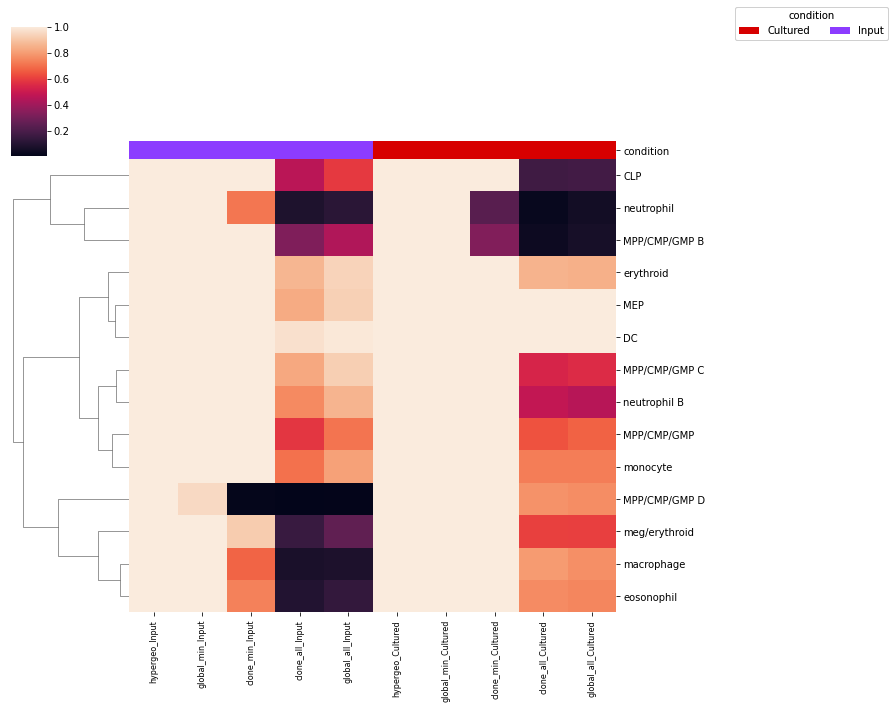

In [29]:
ch.plot_cluster(pval_df, to_col_clust=False, col_meta=clone_meta[["condition"]])